In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

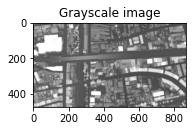

In [20]:
# Convert image in grayscale
path_img = './pic/main.jpg'
img = cv2.imread(path_img)
gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

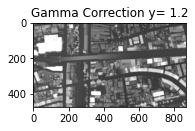

In [21]:
# Contrast adjusting with gamma correction y = 1.2

gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.subplot(222)
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

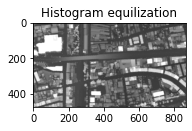

In [22]:
# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(gray_im)
plt.subplot(223)
plt.title('Histogram equilization')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

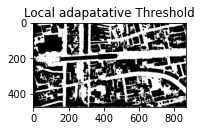

In [23]:
# Local adaptative threshold

thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
thresh = cv2.bitwise_not(thresh)
plt.subplot(221)
plt.title('Local adapatative Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)

In [24]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)

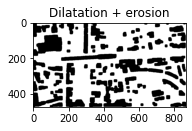

In [25]:
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)
plt.subplot(221)
plt.title('Dilatation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)

objects number is: 5


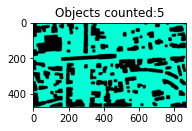

In [26]:
# Labeling

ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()